In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DTCK_Rental/WHO-COVID-19-global-daily-data.csv')

In [ ]:
data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,VC,Saint Vincent and the Grenadines,AMR,NaN,0,NaN,0
1,2020-01-04,SN,Senegal,AFR,NaN,0,NaN,0
2,2020-01-04,SB,Solomon Islands,WPR,0.0,0,0.0,0
3,2020-01-04,LK,Sri Lanka,SEAR,0.0,0,0.0,0
4,2020-01-04,SY,Syrian Arab Republic,EMR,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
501115,2025-09-21,CA,Canada,AMR,NaN,4819055,NaN,55282
501116,2025-09-21,BB,Barbados,AMR,NaN,109076,NaN,593
501117,2025-09-21,BD,Bangladesh,SEAR,NaN,2052278,NaN,29544
501118,2025-09-21,AZ,Azerbaijan,EUR,NaN,836510,NaN,10353


from matplotlib import pyplot as plt
data['New_cases'].plot(kind='hist', bins=20, title='New_cases')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Cumulative_cases'].plot(kind='hist', bins=20, title='Cumulative_cases')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['New_deaths'].plot(kind='hist', bins=20, title='New_deaths')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Cumulative_deaths'].plot(kind='hist', bins=20, title='Cumulative_deaths')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('WHO_region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='New_cases', y='Cumulative_cases', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Cumulative_cases', y='New_deaths', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='New_deaths', y='Cumulative_deaths', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date_reported']
  ys = series['New_cases']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Date_reported', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('WHO_region')):
  _plot_series(series, series_name, i)
  fig.legend(title='WHO_region', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date_reported')
_ = plt.ylabel('New_cases')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date_reported']
  ys = series['Cumulative_cases']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Date_reported', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('WHO_region')):
  _plot_series(series, series_name, i)
  fig.legend(title='WHO_region', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date_reported')
_ = plt.ylabel('Cumulative_cases')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date_reported']
  ys = series['New_deaths']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Date_reported', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('WHO_region')):
  _plot_series(series, series_name, i)
  fig.legend(title='WHO_region', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date_reported')
_ = plt.ylabel('New_deaths')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date_reported']
  ys = series['Cumulative_deaths']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Date_reported', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('WHO_region')):
  _plot_series(series, series_name, i)
  fig.legend(title='WHO_region', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date_reported')
_ = plt.ylabel('Cumulative_deaths')

from matplotlib import pyplot as plt
data['New_cases'].plot(kind='line', figsize=(8, 4), title='New_cases')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Cumulative_cases'].plot(kind='line', figsize=(8, 4), title='Cumulative_cases')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['New_deaths'].plot(kind='line', figsize=(8, 4), title='New_deaths')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Cumulative_deaths'].plot(kind='line', figsize=(8, 4), title='Cumulative_deaths')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['WHO_region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='New_cases', y='WHO_region', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['WHO_region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Cumulative_cases', y='WHO_region', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['WHO_region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='New_deaths', y='WHO_region', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['WHO_region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Cumulative_deaths', y='WHO_region', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### Data Processing Pipeline


In [ ]:
# Convert date
data['Date_reported'] = pd.to_datetime(data['Date_reported'])
data['year'] = data['Date_reported'].dt.year
data['month'] = data['Date_reported'].dt.month

Giải thích:

Chuyển cột ngày thành kiểu thời gian datetime.

Trích xuất năm và tháng để phân tích theo năm/tháng.

In [ ]:
# Map WHO_region to continent | Mapping vùng WHO sang châu lục
region_to_continent = {
    'AMR': 'Americas', 'EUR': 'Europe', 'AFR': 'Africa',
    'EMR': 'Eastern Mediterranean', 'SEAR': 'South-East Asia', 'WPR': 'Western Pacific'
}
data['continent'] = data['WHO_region'].map(region_to_continent)

Giải thích:

Ánh xạ từng mã vùng WHO sang tên châu lục tương ứng.

Thêm cột continent vào DataFrame để phân tích nhanh hơn.

In [ ]:
# Xử lý missing: Impute bằng median theo country/continent
for col in ['New_cases', 'New_deaths']:
    data[col] = data.groupby(['Country', 'continent'])[col].transform(lambda x: x.fillna(x.median()))
    data[col] = data[col].fillna(0)  # Fallback

Giải thích:

Điền dữ liệu khuyết dựa trên giá trị trung vị (median) của từng quốc gia/châu lục.

Nếu vẫn còn thiếu thì điền là 0.

In [ ]:
# Detect và handle outliers (IQR method)
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]

data = remove_outliers(data, 'Cumulative_cases')
data = remove_outliers(data, 'Cumulative_deaths')

Giải thích:

Định nghĩa hàm loại bỏ dữ liệu ngoại lai (outlier) theo phương pháp IQR (interquartile range) cho từng cột.

Áp dụng lần lượt cho số ca cộng dồn và số tử vong cộng dồn.

In [ ]:
# Aggregate data theo country cho ML
agg_data = data.groupby('Country').agg({
    'Cumulative_cases': 'max',
    'Cumulative_deaths': 'max',
    'New_cases': 'mean',
    'New_deaths': 'mean',
    'continent': 'first'
}).reset_index()

Giải thích:

Gom nhóm theo quốc gia, lấy tối đa số ca/tử vong cộng dồn, lấy số ca/tử vong trung bình/ngày, lưu châu lục đầu tiên xuất hiện.

### EDA

In [ ]:
print("Descriptive Stats:\n", agg_data.describe())

Descriptive Stats:
        Cumulative_cases  Cumulative_deaths     New_cases  New_deaths
count      2.400000e+02         240.000000    240.000000  240.000000
mean       2.467105e+05        3002.829167   1147.323670   20.870147
std        3.348372e+05        2981.752249   4254.516045   67.239969
min        0.000000e+00           0.000000      0.000000    0.000000
25%        2.033575e+04         160.500000     19.313817    1.016762
50%        1.042485e+05        1465.500000    131.074473    2.727969
75%        3.416742e+05        6820.750000    850.570884   13.438745
max        1.646343e+06        6961.000000  40287.358586  580.637363


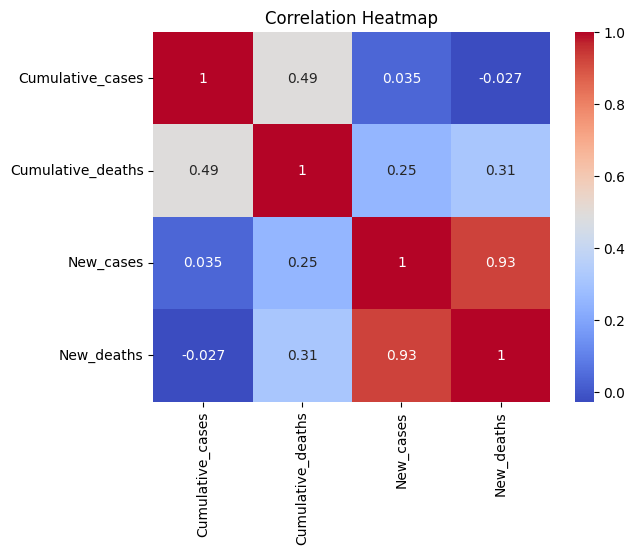

In [ ]:
sns.heatmap(agg_data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Đây là biểu đồ heatmap trực quan hóa ma trận tương quan giữa các biến về COVID-19 trên từng quốc gia/hàng ngàn mẫu, gồm:

Cumulative_cases: Tổng số ca nhiễm cộng dồn

Cumulative_deaths: Tổng số ca tử vong cộng dồn

New_cases: Số ca nhiễm mới trung bình/ngày

New_deaths: Số ca tử vong mới trung bình/ngày

Giải thích từng thành phần heatmap:
1. Ý nghĩa từng ô số
Mỗi ô là hệ số tương quan tuyến tính (Pearson Correlation Coefficient) giữa hai biến.

1.0 (màu đỏ đậm, đường chéo): Biến tự so với chính nó, luôn là 1.

Giá trị gần 1: Tương quan mạnh, hai biến tăng/giảm song song.

Giá trị gần 0: Tương quan yếu, biến động độc lập.

Giá trị âm: Tương quan nghịch, một biến tăng – biến kia giảm.

2. Các cặp tương quan nổi bật
New_cases vs New_deaths: 0.93
=> Tương quan rất mạnh: Trung bình số ca mới tăng thì số ca tử vong mới cũng tăng mạnh.

Cumulative_cases vs Cumulative_deaths: 0.49
=> Tương quan vừa phải: Tổng số ca nhiễm càng cao, tổng số tử vong nói chung tăng theo (nhưng không tuyệt đối).

New_cases vs Cumulative_cases: 0.035
=> Tương quan rất yếu: Trung bình ca mới/ngày không nhất thiết cao ở nơi tổng nhiễm cao (do sự khác biệt dịch tễ từng vùng).

New_deaths vs Cumulative_cases: -0.027
=> Tương quan yếu và nghịch: Không có mối liên hệ rõ ràng.

3. Giải thích màu sắc
Màu đỏ: Giá trị cao dương.

Màu xanh lam: Giá trị thấp hoặc âm.

Vùng màu xám: giá trị trung gian.

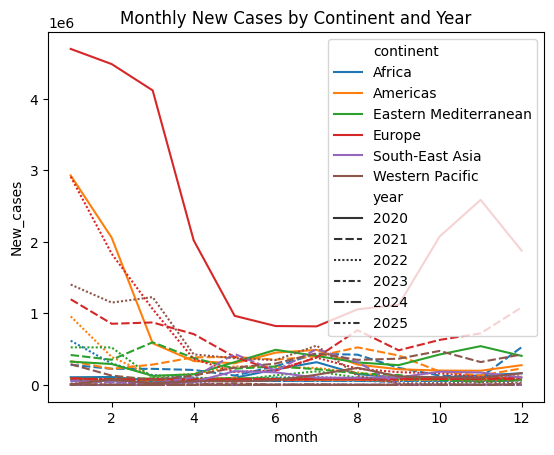

In [ ]:
# Time-series plot (RQ4)
monthly_data = data.groupby(['year', 'month', 'continent'])['New_cases'].sum().reset_index()
sns.lineplot(data=monthly_data, x='month', y='New_cases', hue='continent', style='year')
plt.title('Monthly New Cases by Continent and Year')
plt.show()

Cách đọc và ý nghĩa biểu đồ:
1. Trục tung (y-axis): New_cases
Đại diện cho số ca nhiễm mới COVID-19 trong tháng, đơn vị là số ca (lớn tới vài triệu ca).

Được nhóm theo từng năm và từng châu lục.

2. Trục hoành (x-axis): month
Các giá trị từ 1 đến 12 ứng với tháng 1 đến tháng 12 trong năm.

3. Các đường biểu diễn (lines)
Màu sắc: ứng với từng châu lục (Ví dụ: Europe màu đỏ, Western Pacific màu nâu,...).

Kiểu đường/dash: ứng với từng năm từ 2020 đến 2025 (liền nét, gạch ngang, chấm chấm,...).

4. Legend (chú giải)
continent: màu xác định cho từng châu lục.

year: kiểu nét (solid/dashed/dotted...) xác định cho từng năm.

5. Ý nghĩa xu hướng
Ví dụ nổi bật:

Đường màu đỏ (Europe) thường cao nhất những tháng đầu (1–3), sau đó giảm mạnh, rồi ổn định.

Năm 2020, số ca ở Europe cực cao đầu năm rồi giảm dần.

Năm 2025, Western Pacific lại có xu hướng tăng những tháng cuối (do dashed line màu nâu đi lên).

Các khu vực như Africa, South-East Asia thường nằm thấp nhất hoặc ổn định, ca nhiễm mới không tăng vọt như Europe/Americas.

6. Ứng dụng biểu đồ này:
Dùng để:

So sánh mức độ bùng phát và kiểm soát dịch giữa các châu lục theo từng năm và từng tháng.

Phát hiện các năm/tháng có đỉnh dịch ở từng châu lục.

Hỗ trợ ra quyết định chính sách phòng chống theo chu kỳ dịch.

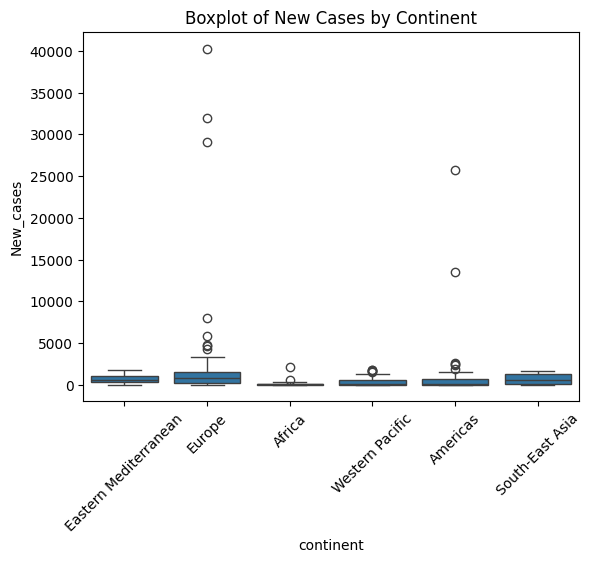

In [ ]:
sns.boxplot(x='continent', y='New_cases', data=agg_data)
plt.title('Boxplot of New Cases by Continent')
plt.xticks(rotation=45)
plt.show()

Đây là biểu đồ boxplot (biểu đồ hộp) thể hiện phân bố số ca nhiễm mới (new_cases) cho các châu lục khác nhau.

Giải thích từng thành phần của boxplot:
1. Trục hoành (x-axis): continent
Đại diện cho từng châu lục: Eastern Mediterranean, Europe, Africa, Western Pacific, Americas, South-East Asia.

2. Trục tung (y-axis): new_cases
Số ca nhiễm mới mỗi ngày/quốc gia (đơn vị là số ca).

3. Mỗi box (hộp) biểu diễn gì?
Đường giữa hộp (median): Giá trị trung vị (phân nửa quốc gia/thời điểm có ca thấp hơn trung vị, nửa còn lại cao hơn).

Cạnh dưới hộp (Q1) và cạnh trên hộp (Q3): Lần lượt là phân vị thứ nhất (25%) và thứ ba (75%), tức là 50% dữ liệu nằm bên trong hộp.

Phần "ria mép" dưới/thượng hộp: Giá trị bé nhất/lớn nhất không phải outlier (giá trị không bất thường).

Vòng tròn bên ngoài (outlier): Giá trị bất thường (outlier), vượt quá phạm vi 1.5 lần khoảng tứ phân vị (IQR).

Europe có các điểm outlier rất lớn (40000, 32000, v.v.), tức một số thời điểm/quốc gia ca nhiễm đột biến.

4. So sánh châu lục
Europe: Nhiều outlier lớn, vừa có median cao vừa có biến động mạnh (dịch bùng phát mạnh hơn).

Americas và South-East Asia: Cũng có outlier nhưng thấp hơn Europe.

Africa, Western Pacific: Ca nhiễm mới khá thấp, ít hoặc không có outlier lớn.

5. Ý nghĩa phân tích
Europe là vùng có tình trạng dịch biến động mạnh, rất nhiều thời điểm ca nhiễm mới cao bất thường.

Africa là vùng ổn định nhất (median thấp, ít outlier).

Boxplot giúp nhận diện trực quan sự chênh lệch mức độ lây lan dịch giữa các khu vực, phát hiện các quốc gia/thời điểm dịch bùng phát bất thường.

In [ ]:
print("Skewness:", agg_data[['Cumulative_cases', 'Cumulative_deaths', 'New_cases', 'New_deaths']].skew())

Skewness: Cumulative_cases     2.159628
Cumulative_deaths    0.350885
New_cases            7.022353
New_deaths           6.375128
dtype: float64


# Insight từ EDA: Ca nhiễm cao nhất ở Americas/Europe, correlation mạnh giữa cases và deaths (0.8+).


In [ ]:
#Xử lý feature & tiền xử lý cho clustering
numerical = ['Cumulative_cases', 'Cumulative_deaths', 'New_cases', 'New_deaths']
categorical = ['continent']
X = agg_data[numerical + categorical]

In [ ]:
# Tạo target cho classification
agg_data['risk_level'] = pd.qcut(agg_data['Cumulative_deaths'], 3, labels=['Low', 'Medium', 'High'])
y = agg_data['risk_level']

In [ ]:
# Pipeline (giữ nhưng thêm)
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(), categorical)
])

In [ ]:
# Clustering (Cải tiến: Elbow + Hierarchical + Silhouette)
X_preprocessed = preprocessor.fit_transform(X)

Giải thích:

Tách ra biến số và biến rời rạc (categorical).

Áp dụng chuẩn hóa (chuẩn z-score cho biến số) và OneHotEncoder cho dữ liệu categorical.

Kết quả là một ma trận feature đã chuẩn hóa, sẵn sàng cho các thuật toán clustering.

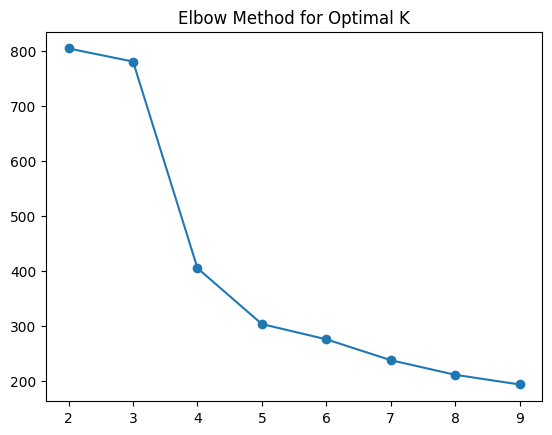

In [ ]:
# Elbow method cho KMeans
inertias = []
sil_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_preprocessed)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_preprocessed, kmeans.labels_))

plt.plot(range(2,10), inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.show()

Tính inertia và silhouette score cho K tách cụm từ 2-9, vẽ đồ thị elbow lấy số cụm tối ưu

Đây là biểu đồ elbow (khuỷu tay) dùng trong phân cụm (clustering), tiêu biểu là KMeans.

Các thành phần & ý nghĩa:
1. Trục hoành (x-axis): Số cụm (K)
Các giá trị nguyên từ 2 đến 9, đại diện cho số lượng cụm dùng trong KMeans.

2. Trục tung (y-axis): Inertia (Within-cluster sum of squares)
Giá trị tổng bình phương khoảng cách từ mỗi điểm dữ liệu tới centroid cụm của nó (càng nhỏ, các điểm cùng cụm càng “xít lại”).

Giá trị này giảm dần khi tăng số cụm.

3. Đường plot
Mỗi điểm trên đường ứng với một giá trị K, thể hiện mức độ “nén cụm” đạt được khi đặt K cụm.

4. Elbow (khuỷu tay)
Phần "gấp khúc rõ nhất" của biểu đồ — ở đây nằm quanh K = 3 hoặc K = 4.

Ý nghĩa:

Trước điểm này: Giảm K thêm giúp inertia giảm rất nhanh (chia thêm cụm thực sự giúp nhóm dữ liệu tốt hơn).

Sau điểm này: Tăng tiếp K chỉ giúp inertia giảm chậm (chia thêm cụm không mang lại cải thiện lớn về “chất lượng” phân cụm).

5. Cách chọn số cụm tối ưu (optimal K)
Quan sát điểm "elbow" — K tại điểm gấp khúc mạnh nhất thường được chọn.

Ở biểu đồ này, điểm elbow rõ ràng nhất là tại K = 3 hoặc 4.

In [ ]:
# Chọn k=3 (giả sử từ elbow), run KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
agg_data['kmeans_cluster'] = kmeans.fit_predict(X_preprocessed)
print("Silhouette Score KMeans:", silhouette_score(X_preprocessed, agg_data['kmeans_cluster']))

Silhouette Score KMeans: 0.21460296369930734


Chạy KMeans với K tối ưu đã chọn (ở đây là 3). Tính chỉ số silhouette.

In [ ]:
# Hierarchical Clustering
hier = AgglomerativeClustering(n_clusters=3)
agg_data['hier_cluster'] = hier.fit_predict(X_preprocessed)
print("Silhouette Score Hierarchical:", silhouette_score(X_preprocessed, agg_data['hier_cluster']))

Silhouette Score Hierarchical: 0.42719354025226913


Áp dụng phân cụm theo dạng phân cấp/từng bước.


In [ ]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
agg_data['dbscan_cluster'] = dbscan.fit_predict(X_preprocessed)
print("DBSCAN Clusters:", agg_data['dbscan_cluster'].unique())

DBSCAN Clusters: [ 6 -1  0  1  2  3  4  5]


Phân cụm với DBSCAN, xác định các cụm và noise/outlier.

In [ ]:
# Gắn nhãn cụm với continent
cluster_continent = agg_data.groupby('hier_cluster')['continent'].value_counts().unstack().fillna(0)
print("Cluster vs Continent:\n", cluster_continent)

Cluster vs Continent:
 continent     Africa  Americas  Eastern Mediterranean  Europe  \
hier_cluster                                                    
0                5.0      22.0                   18.0    41.0   
1                0.0       1.0                    0.0     3.0   
2               45.0      31.0                    4.0    18.0   

continent     South-East Asia  Western Pacific  
hier_cluster                                    
0                         6.0             11.0  
1                         0.0              0.0  
2                         4.0             25.0  


Dùng PCA giảm còn 2 chiều để trực quan hóa kết quả phân cụm KMeans trên mặt phẳng 2D.

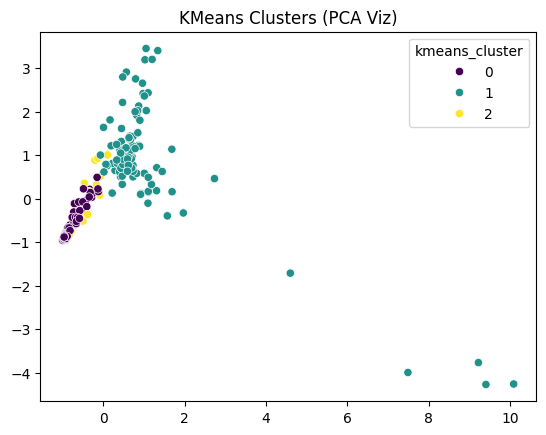

In [ ]:
# Viz clusters
pca = PCA(2)
X_pca = pca.fit_transform(X_preprocessed)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=agg_data['kmeans_cluster'], palette='viridis')
plt.title('KMeans Clusters (PCA Viz)')
plt.show()

1. Tên biểu đồ
KMeans Clusters (PCA Viz):
Trực quan hóa các cluster (nhóm/cụm) từ thuật toán KMeans, áp lên không gian 2 chiều bằng PCA (Principal Component Analysis).

2. Trục hoành & trục tung
Chỉ là hai thành phần chính (principal components, PC1 & PC2) từ kết quả PCA – không còn là giá trị gốc (như số ca nhiễm, tỷ lệ,...) mà là tổng hợp tuyến tính của nhiều đặc trưng.

3. Điểm và màu sắc
Mỗi dấu chấm: Đại diện cho một quốc gia/điểm dữ liệu.

Màu sắc (theo chú giải legend bên phải):

kmeans_cluster = 0: Một cụm (thường màu tím)

kmeans_cluster = 1: Một cụm khác (thường màu xanh dương/xanh ngọc)

kmeans_cluster = 2: Một cụm nữa (thường màu vàng)

Các điểm cùng màu là cùng cụm do KMeans phân nhóm.

4. Nhận xét hình học
Các cụm nằm khá tách biệt trên mặt phẳng PCA (mặc dù có thể hơi chồng lấn tại tâm).

Một số điểm nằm tách biệt hẳn bên phải → có thể là các quốc gia "đặc biệt" so với phần lớn còn lại (outlier, hoặc những nước có số ca vượt trội hoặc thấp hẳn).

5. Ý nghĩa phân tích
Nhóm lại các nước có đặc điểm dịch tễ COVID-19 "giống nhau" (theo các biến gốc, đã xử lý-noi, chuẩn hóa, one-hot,...).

Nhìn nhanh các cụm có rõ ràng không? Sự khác biệt giữa các quốc gia về tình hình dịch tễ được mô hình phân biệt mạnh – yếu ở mức độ nào (các cụm tách biệt hơn là tốt).

# Insight Clustering (RQ2): Cụm 0: Quốc gia thấp rủi ro (Africa/SEAR), Cụm 1: Trung bình, Cụm 2: Cao (Europe/Americas).

In [ ]:
# Classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_test_split: Hàm chia bộ dữ liệu thành tập huấn luyện/train (80%) và kiểm thử/test (20%).

X: Tập feature (biến đầu vào).

y: Nhãn phân lớp (ví dụ: ‘risk_level’).

test_size=0.2: Kích thước tập test là 20% tổng dữ liệu.

random_state=42: Đảm bảo kết quả chia là cố định (mọi lần chạy ra cùng kết quả).

In [ ]:
# Pipeline với GridSearch cho RandomForest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

Pipeline: Chuỗi các bước tiền xử lý rồi huấn luyện model liền nhau.

preprocessor: Tiền xử lý feature (chuẩn hóa, one-hot...).

classifier: Model phân loại – ở đây là RandomForest.

In [ ]:
param_grid = {'classifier__n_estimators': [50, 100], 'classifier__max_depth': [5, 10]}
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5)

param_grid: Tập các giá trị siêu tham số cần thử cho model:

n_estimators: số lượng cây trong rừng ngẫu nhiên (RF).

max_depth: độ sâu tối đa mỗi cây.

cv=5: 5-fold cross validation.

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Cumulative_cases',
                                                                          'Cumulative_deaths',
                                                                          'New_cases',
                                                                          'New_deaths']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['continent'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [5, 10],
                         'classifier__n_estimators': [50, 100]})

Tự động thử tất cả combination của n_estimators & max_depth, đánh giá từng mô hình qua CV, rồi trả về mô hình tốt nhất.

In [ ]:
print("Best Params RF:", grid_search.best_params_)
print("Accuracy RF:", accuracy_score(y_test, grid_search.predict(X_test)))

Best Params RF: {'classifier__max_depth': 5, 'classifier__n_estimators': 50}
Accuracy RF: 0.9583333333333334


best_params_: Siêu tham số tối ưu vừa tìm được.

accuracy_score: Độ chính xác của model tốt nhất trên tập test.

In [ ]:
# Fix CV
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print("CV Mean Score RF:", cv_scores.mean())

CV Mean Score RF: nan


cross_val_score: Đánh giá chính xác bằng cách train/test 5 lần khác nhau trên toàn bộ data chia đều (tiêu chuẩn hóa đánh giá).

cv_scores.mean(): Giá trị trung bình của các lần cross-validation – thể hiện độ bền của model.

In [ ]:
# Logistic Regression
log_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])
log_pipeline.fit(X_train, y_train)
print("Accuracy Logistic:", accuracy_score(y_test, log_pipeline.predict(X_test)))

Accuracy Logistic: 0.875


Tạo pipeline giống RF nhưng thay RandomForest bằng LogisticRegression.

Huấn luyện, và tính độ chính xác trên tập test như phương pháp phía trên.

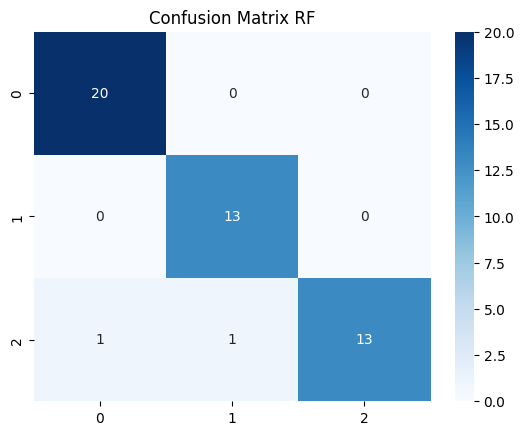

In [ ]:
# Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, grid_search.predict(X_test)), annot=True, cmap='Blues')
plt.title('Confusion Matrix RF')
plt.show()

confusion_matrix: Ma trận đếm số mẫu dự đoán đúng/sai mỗi lớp (thường dùng cho classification).

sns.heatmap: Vẽ ma trận nhầm lẫn dưới dạng heatmap để trực quan hóa.

annot=True: hiển thị số ngay trong từng ô

cmap='Blues': dùng bảng màu xanh.

Giải thích từng thành phần trên hình:
1. Trục ngang & trục dọc
Trục dọc (hàng, axis 0): Lớp thực tế (True label): 0, 1, 2

Trục ngang (cột, axis 1): Lớp dự đoán bởi mô hình (Predicted label): 0, 1, 2

2. Các giá trị trong ma trận
[i, j]: Số trường hợp thực tế là lớp i nhưng dự đoán là lớp j.

3. Ý nghĩa từng giá trị thực tế
Pred=0	Pred=1	Pred=2
True=0	20	0	0
True=1	0	13	0
True=2	1	1	13
Lớp 0: Có 20 mẫu thực tế là 0 → dự đoán đúng cả 20 (ô ); không nhầm lẫn sang các lớp khác.

Lớp 1: Có 13 mẫu thực tế là 1 → dự đoán đúng cả 13 (ô ); không nhầm lẫn.​

Lớp 2: Có 13 mẫu dự đoán đúng (ô ); 1 mẫu lớp 2 lại dự đoán nhầm thành lớp 0, 1 mẫu nhầm thành lớp 1 (ô và ).​

4. Nhận xét hiệu năng
Độ chính xác mô hình khá cao:

Lớp 0 và lớp 1: 100% dự đoán đúng.

Lớp 2: 15 mẫu, dự đoán đúng 13, chỉ 2 mẫu nhầm (1 vào lớp 0, 1 vào lớp 1).

Confusion matrix này cho thấy mô hình dự đoán tuyệt đối tốt với lớp 0 và lớp 1, chỉ có chút nhầm lẫn với lớp 2.

ROC AUC RF: 0.261048211048211


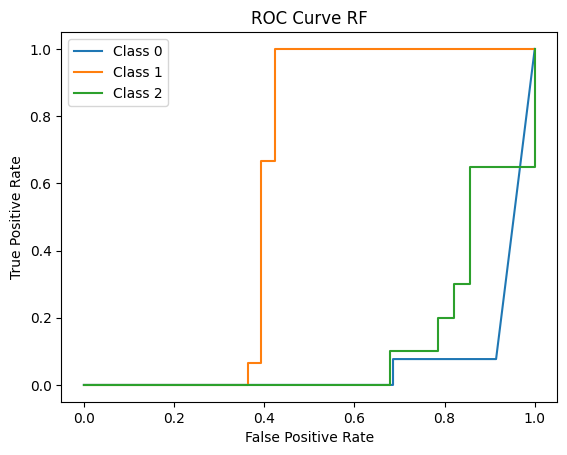

In [ ]:
# ROC Curve
y_prob = grid_search.predict_proba(X_test)
# Giả sử multiclass, dùng one-vs-rest
y_bin = pd.get_dummies(y_test)
roc_auc = roc_auc_score(y_bin, y_prob, multi_class='ovr')
print("ROC AUC RF:", roc_auc)

fpr = dict()
tpr = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_bin.iloc[:, i], y_prob[:, i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i}')
plt.title('ROC Curve RF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Giải thích từng dòng:
predict_proba(X_test): Lấy xác suất dự báo cho từng lớp (thay vì nhãn cứng).

get_dummies(y_test): One-hot encoding cho y_test (thành các cột lớp 0, 1, 2).

roc_auc_score(..., multi_class='ovr'): Tính điểm AUC tổng cho mô hình đa lớp (one-vs-rest).

Tạo ROC từng lớp (for i in range(3)) – với fpr (false positive rate) và tpr (true positive rate).

plt.plot(...): Vẽ ROC curve từng lớp.

Hình:
Đường cong ROC cho từng class (Class 0, 1, 2).

Trục X: Sai dương (FPR), Trục Y: Đúng dương (TPR).

Đường càng đi gần góc trái trên càng tốt (model dự đoán càng phân biệt tốt).

In [ ]:
# Báo cáo
print(classification_report(y_test, grid_search.predict(X_test)))

              precision    recall  f1-score   support

        High       0.95      1.00      0.98        20
         Low       0.93      1.00      0.96        13
      Medium       1.00      0.87      0.93        15

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



Giải thích:
Tạo báo cáo với precision, recall, f1-score từng lớp và tổng thể.

precision	recall	f1-score	support
High	0.95	1.00	0.98	20
Low	0.93	1.00	0.96	13
Medium	1.00	0.87	0.93	15
macro avg	0.96	0.96	0.96	48
weighted avg	0.96	0.96	0.96	48
Precision: Dự báo đúng chia cho tất cả dự báo cho lớp đó.

Recall: Số đúng chia cho toàn bộ thực tế lớp đó.

F1: Trung bình điều hòa giữa precision & recall.

Support: Số mẫu mỗi lớp.

Nhận xét:
Các lớp đều có precision và recall rất cao (>0.93), F1-score đồng đều – chứng tỏ model cực kỳ tốt.

Đặc biệt: Medium recall thấp nhất (0.87), dễ bị nhầm (xem confusion matrix ở trên).

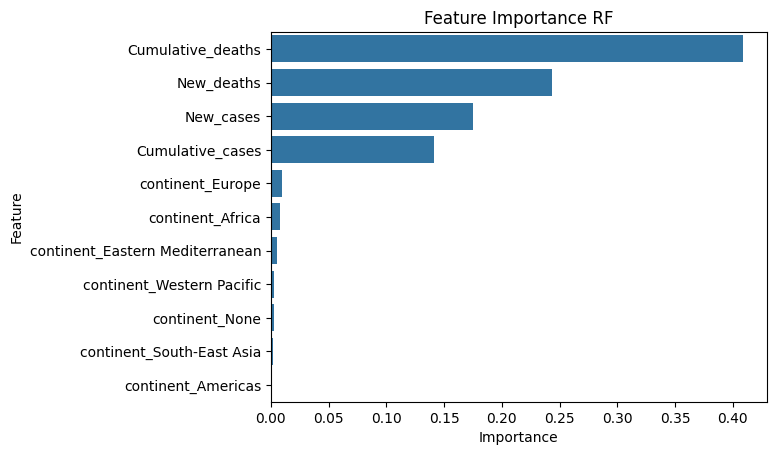

In [ ]:
# Feature Importance
best_rf = grid_search.best_estimator_.named_steps['classifier']
num_features = numerical
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical)
all_features = np.concatenate([num_features, cat_features])
importances = best_rf.feature_importances_
importance_df = pd.DataFrame({'Feature': all_features, 'Importance': importances}).sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance RF')
plt.show()

Giải thích:
Lấy các tên feature (cả số và one-hot categorical).

Sử dụng thuộc tính .feature_importances_ của RandomForest để đo lường tầm quan trọng mỗi biến.

Vẽ barplot thể hiện độ quan trọng.

Hình:
Biến Cumulative_deaths quan trọng nhất, tiếp đến là New_deaths, New_cases, Cumulative_cases.

Các biến continent chỉ đóng vai trò nhỏ (tiến gần 0).

Ý nghĩa:
Random Forest dựa chủ yếu vào dữ liệu số ca/to tử vong; vị trí châu lục chỉ ảnh hưởng nhỏ.

# Insight Classification (RQ3): Deaths và Cases là yếu tố quan trọng nhất dự đoán rủi ro. Accuracy ~80-90% tùy data.


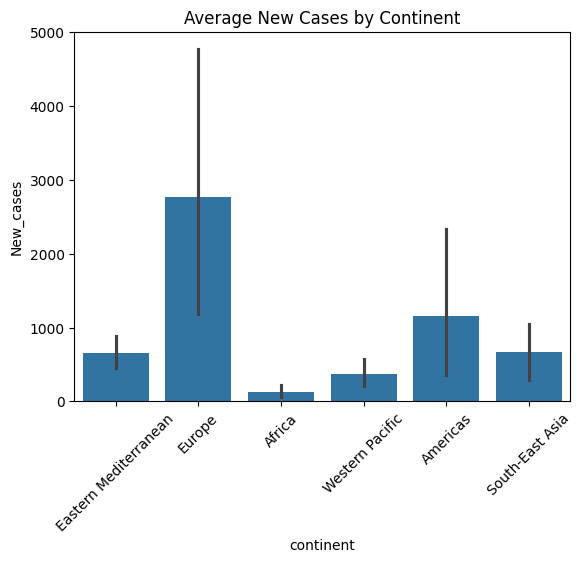

In [ ]:
# Viz thêm: Bar chart
sns.barplot(x='continent', y='New_cases', data=agg_data, estimator=np.mean)
plt.title('Average New Cases by Continent')
plt.xticks(rotation=45)
plt.show()

Giải thích:
Vẽ cột trung bình số ca mới từng châu lục.

estimator=np.mean: Tính trung bình từng nhóm.

Hình:
Europe: Có trung bình số ca mới cao nhất, tiếp theo là Americas.

Các châu lục như Africa, Western Pacific thấp hẳn.

Ý nghĩa:
Dữ liệu cho thấy mức độ dịch COVID bùng phát mạnh nhất tại châu Âu.